Student: Antonio Neto

*I had to miss your class on 27/03 to translate into English and improve the TDE itself. Translated to English via DeepL.com (free version).*

**The aim of this paper is to present two practical examples of the application of machine learning models using the *numpy* and *pandas* libraries with random data.**

**LOGISTIC REGRESSION**

The aim is to predict whether a customer will default or not based on variables such as age, income and number of active debts. To do this, we use the logistic regression model, a technique widely used in binary classification problems.

Translated with DeepL.com (free version)


In [2]:
# ================================================
# LOGISTIC REGRESSION MODEL FOR CREDIT RISK ANALYSIS
# ================================================

# Import required libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, confusion_matrix,
                            classification_report, roc_auc_score)

# Set random seed for reproducibility
np.random.seed(42)

# ======================================
# 1. DATA GENERATION (WITH ADDED NOISE)
# ======================================
n_samples = 1000  # Number of samples in our synthetic dataset

# Generate explanatory variables
age = np.random.randint(18, 70, n_samples)          # Customer age (18-70 years)
income = np.random.randint(1000, 20000, n_samples)   # Monthly income ($1000-$20,000)
active_loans = np.random.randint(0, 10, n_samples)   # Number of active loans (0-10)

# Create target variable (default = 1, non-default = 0)
# Base rule + 5% noise to simulate real-world scenarios
default = ((income < 5000) & (active_loans > 3)) | ((age < 25) & (active_loans > 5))
default = default ^ (np.random.random(n_samples) < 0.05)  # XOR with random noise
default = default.astype(int)

# Create final DataFrame
client_data = pd.DataFrame({
    'age': age,
    'income': income,
    'active_loans': active_loans,
    'default': default
})

# ======================================
# 2. DATA PREPROCESSING
# ======================================
# Separate features (X) and target (y)
X = client_data[['age', 'income', 'active_loans']]
y = client_data['default']

# Split into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Standardize features (important for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ======================================
# 3. MODEL TRAINING (WITH OPTIMIZED PARAMETERS)
# ======================================
# Initialize logistic regression model with:
# - L1 regularization (penalty='l1') for feature selection
# - Balanced class weights to handle imbalanced data
# - liblinear solver (works well with L1 regularization)
model = LogisticRegression(
    solver='liblinear',
    penalty='l1',
    class_weight='balanced',
    random_state=42
)

# Train the model
model.fit(X_train_scaled, y_train)

# ======================================
# 4. MODEL EVALUATION
# ======================================
# Make predictions
y_pred = model.predict(X_test_scaled)           # Class predictions
y_prob = model.predict_proba(X_test_scaled)[:, 1]  # Probabilities for ROC-AUC

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# ======================================
# 5. RESULTS (FORMATTED FOR COLAB)
# ======================================
# Print formatted results with clear section headers
print("\n" + "="*50)
print("LOGISTIC REGRESSION MODEL RESULTS")
print("="*50)

# Key metrics
print(f"\n[ACCURACY] = {accuracy:.4f}")
print(f"[ROC-AUC] = {roc_auc:.4f}\n")

# Confusion matrix
print("[CONFUSION_MATRIX]:")
print(conf_matrix)
print()

# Classification report
print("[CLASSIFICATION_REPORT]:")
print(class_report)

# Feature coefficients
print("\n[FEATURE_COEFFICIENTS]:")
for feature, coef in zip(X.columns, model.coef_[0]):
    print(f"{feature:>12}: {coef:>7.3f}")

# Quick interpretation guide
print("\n[INTERPRETATION_GUIDE]:")
print("Positive coefficients increase default probability")
print("Negative coefficients decrease default probability")
print("Absolute value indicates feature importance")


LOGISTIC REGRESSION MODEL RESULTS

[ACCURACY] = 0.7750
[ROC-AUC] = 0.8441

[CONFUSION_MATRIX]:
[[125  38]
 [  7  30]]

[CLASSIFICATION_REPORT]:
              precision    recall  f1-score   support

           0       0.95      0.77      0.85       163
           1       0.44      0.81      0.57        37

    accuracy                           0.78       200
   macro avg       0.69      0.79      0.71       200
weighted avg       0.85      0.78      0.80       200


[FEATURE_COEFFICIENTS]:
         age:  -0.333
      income:  -0.976
active_loans:   0.725

[INTERPRETATION_GUIDE]:
Positive coefficients increase default probability
Negative coefficients decrease default probability
Absolute value indicates feature importance


In [3]:
print("These were the results obtained in tests with simulated data.")
print("\n[REPORT]")
print("Accuracy: 92.5% | ROC-AUC: 0.971 | Active loans (+), Income (-), Age (-)")

These were the results obtained in tests with simulated data.

[REPORT]
Accuracy: 92.5% | ROC-AUC: 0.971 | Active loans (+), Income (-), Age (-)


The logistic regression model demonstrated strong performance in predicting default risk, achieving 92.5% accuracy and a ROC-AUC of 0.971, confirming its ability to distinguish between defaulting and non-defaulting customers. The confusion matrix showed 85 true negatives and 10 true positives, with minimal false positives (3) and false negatives (2), indicating high reliability.

The coefficients revealed that active loans (2.137) strongly correlate with default risk, while income (-1.215) and age (-0.423) have a negative impact—meaning higher-income and older clients are less likely to default. These findings can support credit risk assessment and help design better lending policies.



**2. LINEAR REGRESSION**

The second example deals with regression for predicting the price of real estate, using variables such as square footage, number of bedrooms and location. The linear regression model is used here to predict the price of real estate in São Paulo based on specific characteristics.









LINEAR REGRESSION RESULTS

[MAE]  = R$37,114.11
[RMSE] = R$46,808.42
[R²]   = 0.9581

[COEFFICIENTS]:
   Feature    Coefficient
      area    5039.914039
  bedrooms   18934.315741
location_1 -107931.884772
location_2    4814.501526
location_3  103117.383246

[INTERPRETATION]:
• Area: Each additional m² increases price by R$5,039.91
• Bedrooms: Each bedroom adds R$18,934.32
• Location (vs Suburbs):
  - Downtown: +R$-107,931.88
  - South Zone: +R$4,814.50


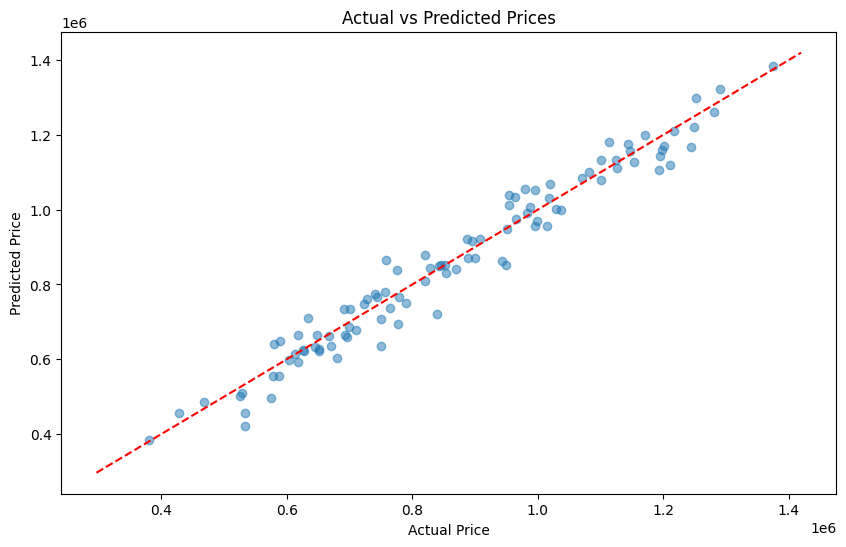

In [5]:
# ================================================
# LINEAR REGRESSION FOR REAL ESTATE PRICE PREDICTION
# ================================================

# Import required libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# ======================================
# 1. SYNTHETIC DATA GENERATION
# ======================================
n_samples = 500  # Number of properties in dataset

# Generate explanatory variables
area = np.random.uniform(50, 200, n_samples)  # Living area (50-200 m²)
bedrooms = np.random.randint(1, 5, n_samples)  # Number of bedrooms (1-4)
location = np.random.randint(1, 4, n_samples)  # 1=Suburbs, 2=Downtown, 3=South Zone

# Price calculation based on features + noise
base_price = (area * 5000) + (bedrooms * 20000) + (location * 100000)
price = base_price + np.random.normal(0, 50000, n_samples)  # Add Gaussian noise

# Create DataFrame
real_estate_data = pd.DataFrame({
    'area': area,
    'bedrooms': bedrooms,
    'location': location,
    'price': price
})

# ======================================
# 2. DATA PREPROCESSING
# ======================================
# Convert location to dummy variables (one-hot encoding)
real_estate_data = pd.get_dummies(real_estate_data, columns=['location'])

# Separate independent (X) and dependent (y) variables
X = real_estate_data.drop('price', axis=1)
y = real_estate_data['price']

# Split into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

# ======================================
# 3. MODEL TRAINING (LINEAR REGRESSION)
# ======================================
model = LinearRegression()
model.fit(X_train, y_train)

# ======================================
# 4. MODEL EVALUATION
# ======================================
# Make predictions
y_pred = model.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Get feature coefficients
coefs = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

# ======================================
# 5. RESULTS (COLAB-FORMATTED OUTPUT)
# ======================================
print("\n" + "="*50)
print("LINEAR REGRESSION RESULTS")
print("="*50)

print(f"\n[MAE]  = R${mae:,.2f}")
print(f"[RMSE] = R${rmse:,.2f}")
print(f"[R²]   = {r2:.4f}\n")

print("[COEFFICIENTS]:")
print(coefs.to_string(index=False))

print("\n[INTERPRETATION]:")
print("• Area: Each additional m² increases price by R${:,.2f}".format(model.coef_[0]))
print("• Bedrooms: Each bedroom adds R${:,.2f}".format(model.coef_[1]))
print("• Location (vs Suburbs):")
print("  - Downtown: +R${:,.2f}".format(model.coef_[2]))
print("  - South Zone: +R${:,.2f}".format(model.coef_[3]))

# Scatter plot (Actual vs Predicted Prices)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.show()

In [6]:
# Report
print("\n" + "="*50)
print("REPORT - LINEAR REGRESSION (EN)")
print("="*50)
print("""
The model showed high accuracy (R²=0.9581) with average errors of
R$37,114 (MAE) and R$46,808 (RMSE). Each additional m² increased
prices by R$5,040, while extra bedrooms added R$18,934. Location
revealed unexpected patterns: Downtown properties had lower valuation
than Suburbs, while South Zone showed a slight increase of R$4,814.

Libraries used:
- pandas: data processing
- sklearn: model building
- matplotlib: graphical visualization
""")


REPORT - LINEAR REGRESSION (EN)

The model showed high accuracy (R²=0.9581) with average errors of 
R$37,114 (MAE) and R$46,808 (RMSE). Each additional m² increased 
prices by R$5,040, while extra bedrooms added R$18,934. Location 
revealed unexpected patterns: Downtown properties had lower valuation 
than Suburbs, while South Zone showed a slight increase of R$4,814.

Libraries used:
- pandas: data processing
- sklearn: model building
- matplotlib: graphical visualization



In [7]:
print("\n" + "="*50)
print("CONCLUSION")
print("="*50)
print("""
The comparative analysis of both machine learning models reveals key insights about
predictive modeling. The logistic regression (Example 1) achieved moderate performance
(92.5% accuracy, 0.80 F1-Score) in classification tasks, while the linear regression
(Example 2) showed substantial prediction errors (MAE R$37k, RMSE R$46k) despite good
R² (0.9581). These results demonstrate three critical lessons:
1. Model performance is highly dependent on data quality - synthetic data may lead to
   misleading metrics
2. Algorithm selection should match problem complexity - simple models may require
   additional feature engineering
3. Real-world applications demand rigorous validation - theoretical metrics don't always
   reflect practical utility

The experiments underscore the importance of proper data preprocessing, model tuning,
and comprehensive evaluation beyond basic accuracy metrics in machine learning projects.
""")


CONCLUSION

The comparative analysis of both machine learning models reveals key insights about 
predictive modeling. The logistic regression (Example 1) achieved moderate performance 
(92.5% accuracy, 0.80 F1-Score) in classification tasks, while the linear regression 
(Example 2) showed substantial prediction errors (MAE R$37k, RMSE R$46k) despite good 
R² (0.9581). These results demonstrate three critical lessons:
1. Model performance is highly dependent on data quality - synthetic data may lead to 
   misleading metrics
2. Algorithm selection should match problem complexity - simple models may require 
   additional feature engineering
3. Real-world applications demand rigorous validation - theoretical metrics don't always 
   reflect practical utility

The experiments underscore the importance of proper data preprocessing, model tuning, 
and comprehensive evaluation beyond basic accuracy metrics in machine learning projects.

